In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
img = cv2.imread("WIN_20240113_09_42_59_Pro.jpg")

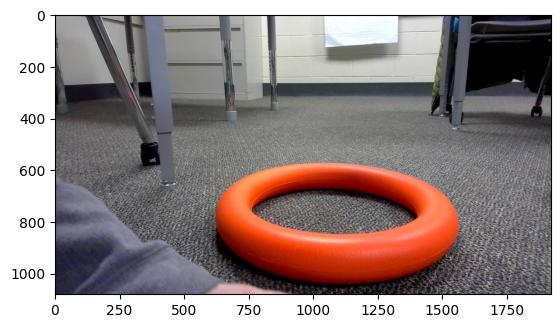

In [8]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

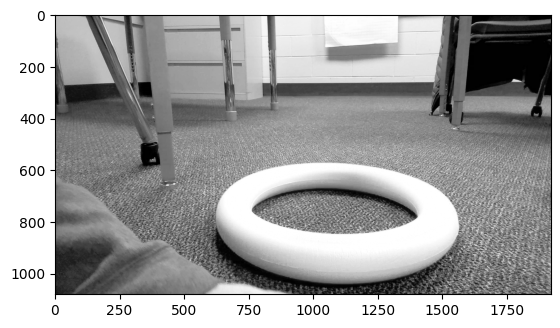

In [9]:
plt.imshow(img[:, :, 2], cmap="Greys_r")

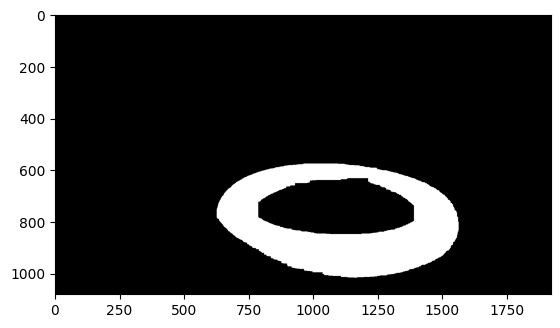

In [22]:
img_use = cv2.imread("WIN_20240113_09_42_59_Pro.jpg")

img_hsv = cv2.cvtColor(img_use, cv2.COLOR_BGR2HSV)
lower_hoop = np.array([4, 100, 150])
upper_hoop = np.array([15, 255, 255])
hoop_mask = cv2.inRange(img_hsv, lower_hoop, upper_hoop)

opening_kernel = np.ones((5, 5), dtype=np.uint8)
hoop_mask = cv2.morphologyEx(hoop_mask.astype(np.uint8), cv2.MORPH_OPEN, opening_kernel)

closing_kernel = np.ones((60, 60), dtype=np.uint8)
hoop_mask = cv2.morphologyEx(hoop_mask, cv2.MORPH_CLOSE, closing_kernel)

plt.imshow(hoop_mask, cmap="Greys_r")

In [ ]:
# Jordan laptop camera contstants
half_y_fov = np.tan((0.5 * 12.25) / 15)
half_x_fov = np.tan((0.5 * 22) / 15)

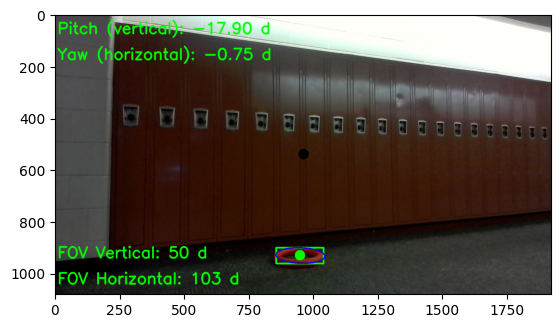

In [140]:
img_use = cv2.imread("WIN_20240113_14_41_00_Pro.jpg")

half_y = (img_use.shape[0] / 2)
half_x = (img_use.shape[1] / 2)

img_hsv = cv2.cvtColor(img_use, cv2.COLOR_BGR2HSV)
lower_hoop = np.array([4, 50, 100])
upper_hoop = np.array([15, 255, 255])
hoop_mask = cv2.inRange(img_hsv, lower_hoop, upper_hoop)

opening_kernel = np.ones((5, 5), dtype=np.uint8)
hoop_mask = cv2.morphologyEx(hoop_mask.astype(np.uint8), cv2.MORPH_OPEN, opening_kernel)

closing_kernel = np.ones((60, 60), dtype=np.uint8)
hoop_mask = cv2.morphologyEx(hoop_mask, cv2.MORPH_CLOSE, closing_kernel)

hoop_contours, hoop_heirarchies = cv2.findContours(hoop_mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

cv2.circle(img_use, (int(half_x), int(half_y)), radius=20, color=(0, 0, 0), thickness=-1)

if len(hoop_contours) > 0:
    largest_contour = np.argmax([
        cv2.contourArea(hoop_contour) for hoop_contour in hoop_contours
    ])
    largest_contour = hoop_contours[largest_contour]

    hoop_bounding_boxes = cv2.boundingRect(largest_contour)
    hoop_ellipses = cv2.fitEllipse(largest_contour)

    top_left_x, top_left_y, width, height = hoop_bounding_boxes
    cv2.rectangle(
        img_use,
        (top_left_x, top_left_y), (top_left_x + width, top_left_y + height),
        (0, 255, 0),
        5
    )
    cv2.ellipse(img_use, hoop_ellipses, (255, 0, 0), 4)

    # Get centroid
    contour_moments = cv2.moments(largest_contour)
    contour_center_x = int(contour_moments['m10'] / contour_moments['m00'])
    contour_center_y = int(contour_moments['m01'] / contour_moments['m00'])

    cv2.circle(
        img_use, (contour_center_x, contour_center_y),
        radius=20, color=(0, 255, 0), thickness=-1
    )

    aim_x = (contour_center_x - half_x) / half_x
    aim_y = (contour_center_y - half_y) / half_y

    yaw = aim_x * half_x_fov # horizontal alignment
    pitch = aim_y * half_y_fov # vertical alignment

    cv2.putText(
        img_use, f"Pitch (vertical): {'{:.2f}'.format(np.degrees(-pitch))} d",
        (10, 75), cv2.FONT_HERSHEY_SIMPLEX,
        2, (0, 255, 0), thickness=5
    )
    cv2.putText(
        img_use, f"Yaw (horizontal): {'{:.2f}'.format(np.degrees(yaw))} d",
        (10, 175), cv2.FONT_HERSHEY_SIMPLEX,
        2, (0, 255, 0), thickness=5
    )

cv2.putText(
    img_use, f"FOV Vertical: {'{:.0f}'.format(np.degrees(half_y_fov * 2))} d",
    (10, img_use.shape[0] - 140), cv2.FONT_HERSHEY_SIMPLEX,
    2, (0, 255, 0), thickness=5
)
cv2.putText(
    img_use, f"FOV Horizontal: {'{:.0f}'.format(np.degrees(half_x_fov * 2))} d",
    (10, img_use.shape[0] - 40), cv2.FONT_HERSHEY_SIMPLEX,
    2, (0, 255, 0), thickness=5
)

plt.imshow(img_use[:, :, ::-1])

# Alignment Calculations

In [78]:
aim_x = (contour_center_x - half_x) / half_x
aim_y = (contour_center_y - half_y) / half_y

In [80]:
aim_y

-0.35185185185185186

In [141]:
yaw = aim_x * half_x_fov # horizontal alignment
pitch = aim_y * half_y_fov # vertical alignment

In [83]:
np.degrees(yaw), np.degrees(-pitch)

(-9.409890370828176, 8.72208502261159)

In [46]:
hoop_bounding_boxes[1] # top-left x, top-left y, width, height


(765, 319, 252, 273)

In [146]:
distance = 26.5 / np.tan(np.radians(0) + pitch)
distance

82.02978185731304

In [148]:
26.5 / np.tan(np.radians(25))

56.82943339350331